In [1]:
# Importo las librerias a utilizar
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

### **Análisis de los datos de las empresas que conforman el SP500**

In [2]:
# Extraigo los datos de wikipedia de los SP500
data_companies = pd.concat(pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'), axis=1)

In [3]:
# Visualizo la información
data_companies.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded,"(Date, Date)","(Added, Ticker)","(Added, Security)","(Removed, Ticker)","(Removed, Security)","(Reason, Reason)"
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,"January 5, 2023",NaN,NaN,VNO,Vornado Realty Trust,Market capitalization change.[4]
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916,"January 4, 2023",GEHC,GE HealthCare,NaN,NaN,S&P 500 constituent General Electric spun off ...
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888,"December 22, 2022",STLD,Steel Dynamics,ABMD,Abiomed,S&P 500 constituent Johnson & Johnson acquired...
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888),"December 19, 2022",FSLR,First Solar,FBHS,Fortune Brands Home & Security,Market capitalization change.[7]
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989,"December 19, 2022",NaN,NaN,MBC,MasterBrand,Market capitalization change.[7]


In [4]:
# Selecciono columnas más relevantes
data = data_companies.loc[:,('Symbol','Security', 'GICS Sector', 'GICS Sub-Industry', 'Headquarters Location','Date added', 'CIK', 'Founded')]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   GICS Sector            503 non-null    object
 3   GICS Sub-Industry      503 non-null    object
 4   Headquarters Location  503 non-null    object
 5   Date added             499 non-null    object
 6   CIK                    503 non-null    int64 
 7   Founded                503 non-null    object
dtypes: int64(1), object(7)
memory usage: 35.4+ KB


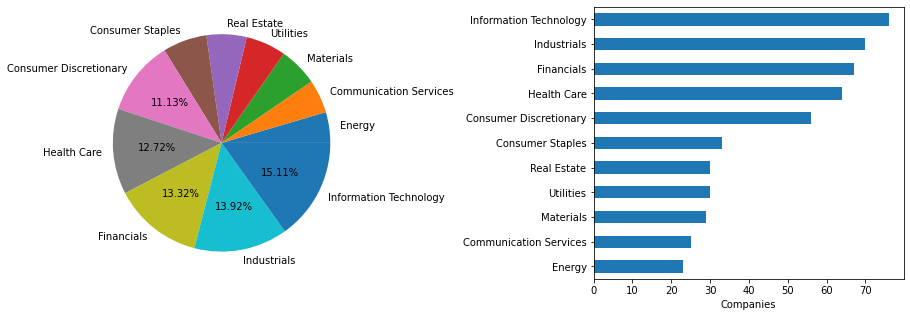

In [6]:
#Visualizo los sectores de negocio que conforman el SP500
sectors = data['GICS Sector'].value_counts(ascending=True)

fig, axs= plt.subplots(1, 2, figsize=(15, 5))

# Plot torta
def autopct(pct): # se muestran solo los sectores que representan más del 10%
    return ('{:.2f}%'.format(pct))  if pct > 10 else ''

sectors.plot(kind='pie', autopct=autopct, ax=axs[0])
axs[0].axes.get_yaxis().set_visible(False)

# Plot barras
sectors.plot(kind='barh', ax=axs[1])
axs[1].set_xlabel('Companies')

plt.subplots_adjust(wspace=0.7)

In [7]:
# Exporto el archivo a un csv nuevo:
data.to_csv("SP500_companies.csv")

### **Selección de las empresas que voy a analizar**

In [8]:
# Extraigo los tickers para realizar la extracción de datos financieron con yfinance
data['Symbol'] = data['Symbol'].str.replace(".", "-") 
tickers = data['Symbol'].values.tolist()
tickers

C:\Users\maric\AppData\Local\Temp\ipykernel_13968\4048235890.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Symbol'] = data['Symbol'].str.replace(".", "-")


['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK-B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA

In [9]:
# Extraigo la información de yahoo finance
data_company = yf.download(tickers, start='2000-01-01', end='2023-01-01', rounding=True)

[*********************100%***********************]  503 of 503 completed


In [10]:
# Visualizo al información  
data_company.head()

Adj Close                                                  ...  \
                   A AAL AAP  AAPL ABBV   ABC   ABT  ACGL ACN   ADBE  ...   
Date                                                                  ...   
2000-01-03     44.00 NaN NaN  0.85  NaN  2.99  9.22  1.28 NaN  16.27  ...   
2000-01-04     40.64 NaN NaN  0.78  NaN  2.78  8.96  1.27 NaN  14.91  ...   
2000-01-05     38.12 NaN NaN  0.79  NaN  3.00  8.94  1.39 NaN  15.20  ...   
2000-01-06     36.67 NaN NaN  0.72  NaN  3.23  9.25  1.38 NaN  15.33  ...   
2000-01-07     39.72 NaN NaN  0.76  NaN  3.65  9.35  1.45 NaN  16.07  ...   

           Volume                                                        \
             WYNN      XEL       XOM     XRAY XYL      YUM ZBH     ZBRA   
Date                                                                      
2000-01-03    NaN  2738600  13458200   582300 NaN  3033493 NaN  1055700   
2000-01-04    NaN   425200  14510800   317700 NaN  3315031 NaN   522450   
2000-01-05    NaN   500200  17485000  1188000 NaN  4642602 NaN   612225   
2000-01-06    NaN   344100  19461600   534300 NaN  3947658 NaN   263925   
2000-01-07    NaN   469500  16603800  1401000 NaN  6063647 NaN   333900   

                         
               ZION ZTS  
Date                     
2000-01-03  1199600 NaN  
2000-01-04   816100 NaN  
2000-01-05  1124700 NaN  
2000-01-06  1112100 NaN  
2000-01-07   782000 NaN  

[5 rows x 3018 columns]

In [11]:
# Copia de datos financieros ordenada por fecha 
data_company_2 = data_company.copy()
data_company_2.sort_index(inplace=True)
data_company_2.head()

Adj Close                                                  ...  \
                   A AAL AAP  AAPL ABBV   ABC   ABT  ACGL ACN   ADBE  ...   
Date                                                                  ...   
2000-01-03     44.00 NaN NaN  0.85  NaN  2.99  9.22  1.28 NaN  16.27  ...   
2000-01-04     40.64 NaN NaN  0.78  NaN  2.78  8.96  1.27 NaN  14.91  ...   
2000-01-05     38.12 NaN NaN  0.79  NaN  3.00  8.94  1.39 NaN  15.20  ...   
2000-01-06     36.67 NaN NaN  0.72  NaN  3.23  9.25  1.38 NaN  15.33  ...   
2000-01-07     39.72 NaN NaN  0.76  NaN  3.65  9.35  1.45 NaN  16.07  ...   

           Volume                                                        \
             WYNN      XEL       XOM     XRAY XYL      YUM ZBH     ZBRA   
Date                                                                      
2000-01-03    NaN  2738600  13458200   582300 NaN  3033493 NaN  1055700   
2000-01-04    NaN   425200  14510800   317700 NaN  3315031 NaN   522450   
2000-01-05    NaN   500200  17485000  1188000 NaN  4642602 NaN   612225   
2000-01-06    NaN   344100  19461600   534300 NaN  3947658 NaN   263925   
2000-01-07    NaN   469500  16603800  1401000 NaN  6063647 NaN   333900   

                         
               ZION ZTS  
Date                     
2000-01-03  1199600 NaN  
2000-01-04   816100 NaN  
2000-01-05  1124700 NaN  
2000-01-06  1112100 NaN  
2000-01-07   782000 NaN  

[5 rows x 3018 columns]

In [12]:
# Datos financieros por cada ticker
list(data_company_2.columns.levels[0])

['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

Indicadores financieros

In [13]:
gap_return = np.log(data_company_2['Open']/data_company_2['Close'].shift(1)).fillna(0)
intra_return = np.log(data_company_2['Close']/data_company_2['Open']).fillna(0)
variation = data_company_2['Adj Close'].pct_change()
volatility = (data_company_2['Adj Close'].pct_change()).rolling(250).std()*100*(250)**0.5

Mejor día para invertir teniendo en cuenta el retorno de los movimiento gap

In [14]:
gap_return['Week Day'] = gap_return.index.map(lambda x: x.weekday())
gap_return_day = pd.DataFrame(gap_return.groupby('Week Day').sum().T.mean(), columns=['Gap Return'])
gap_return_day = gap_return_day.rename(index={0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes'})
gap_return_day

,Gap Return
Week Day,
Lunes,-0.051061
Martes,0.676275
Miércoles,0.142941
Jueves,-0.067145
Viernes,0.188224


El mejor día para invertir solo teniendo en cuenta los rendimientos gap es el martes, con un retorno promedio en el periodo de 0.67%. 
El peor dia para realizar esta estrategia es el jueves, con un retorno promedio en el periodo bajo estudio de un -0.06%.

In [15]:
# Mejores industrias que pertenecen al SP500 en las cuales se puede invertir
ticker_growth = (((data_company_2['Close'] - data_company_2['Open']) / data_company_2['Open']) * 100).sum()
ticker_growth = pd.DataFrame(ticker_growth, columns=['Crecimiento'])
ticker_growth = ticker_growth.merge(data, left_on=ticker_growth.index, right_on='Symbol')
ticker_growth.drop(ticker_growth.columns.difference(['Crecimiento','Symbol', 'GICS Sector']), 1, inplace=True)
sector_growth = ticker_growth.groupby('GICS Sector').mean()
sector_growth.sort_values('Crecimiento', ascending=False, inplace=True)
sector_growth

C:\Users\maric\AppData\Local\Temp\ipykernel_13968\60105745.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ticker_growth.drop(ticker_growth.columns.difference(['Crecimiento','Symbol', 'GICS Sector']), 1, inplace=True)


,Crecimiento
GICS Sector,
Health Care,273.151363
Consumer Staples,248.724396
Information Technology,236.859647
Real Estate,219.518857
Industrials,210.263330
Utilities,182.203074
Financials,179.198582
Consumer Discretionary,162.406559
Materials,109.525856


In [16]:
ticker_growth = (((data_company_2['Close'] - data_company_2['Open']) / data_company_2['Open']) * 100).sum()
ticker_growth = pd.DataFrame(ticker_growth, columns=['Crecimiento'])
ticker_growth = ticker_growth.merge(data, left_on=ticker_growth.index, right_on='Symbol')
ticker_growth.drop(ticker_growth.columns.difference(['Crecimiento','Symbol', 'Security']), 1, inplace=True)
ticker_growth = ticker_growth.groupby('Security').mean()
ticker_growth = ticker_growth.sort_values(by='Crecimiento', ascending=False)
top_5 = ticker_growth[:5]
top_5

C:\Users\maric\AppData\Local\Temp\ipykernel_13968\4148714486.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ticker_growth.drop(ticker_growth.columns.difference(['Crecimiento','Symbol', 'Security']), 1, inplace=True)


,Crecimiento
Security,
"NVR, Inc.",861.780173
Monster Beverage,782.894623
Idexx Laboratories,778.206957
Accenture,756.560154
Nordson Corporation,749.418445


### **Análisis del SP500**

In [24]:
data_GSPC = yf.download('^GSPC', start='2000-01-01', end='2023-01-01',rounding=True)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [25]:
data_GSPC_1_fdif = data_GSPC.pct_change()
data_GSPC_1_diff= data_GSPC_1_fdif.dropna()

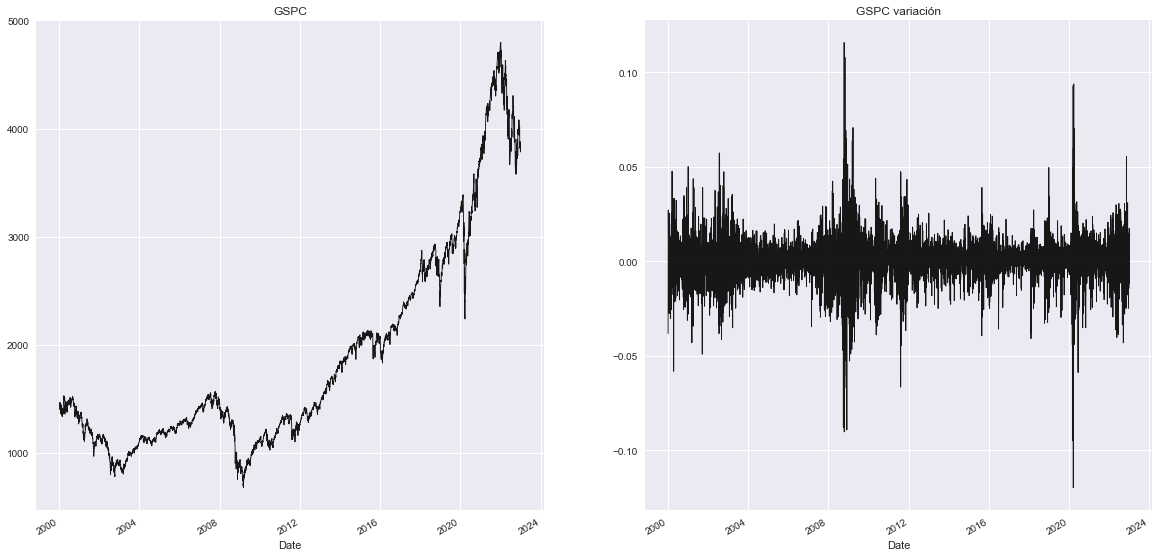

In [33]:
#Concateno ambas series en un DataFrame 
plt.style.use('seaborn')
combineSP500 = pd.concat([data_GSPC, data_GSPC_1_fdif], axis=1)
combineSP500 = combineSP500.dropna()
combineSP500.plot(subplots = True, legend = False, layout = (1,2), figsize = (20,10), 
                  title = ["GSPC", "GSPC variación"], color = "black", linewidth = 0.9, alpha = 0.9)
plt.show()